In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import os
os.chdir('/content/drive/AI/Santander')

In [4]:
import numpy as np
import pandas as pd
from xgboost.sklearn import XGBRegressor
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [0]:
train_df= pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [0]:
pd.options.display.max_columns = 1000

In [7]:
print(train_df.shape)
print(test_df.shape)

(4459, 4993)
(49342, 4992)


In [8]:
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,c38ca8ae3,b21f5b472,1ff6be905,b9b7f388d,51ebff825,1a5a424f8,51c534b54,22b980fc8,9cc5d1d8f,7720ab0dd,63be1f619,f416800e9,f18d3931b,a61ce65a2,b77bc4dac,be448d5b9,5a53ebb69,437ff8730,c224ec4d9,212226b7b,170230a4c,c98c2d3c0,d5858c659,e8f065c9d,856225035,039b8bbc6,d4e8dd865,c44348d76,cc35ec717,d2919256b,b0b1c81ac,1f1f641f1,5df2068b0,6cd6037bd,a61dfaaa3,aac0c81ba,87ba106d3,cb5161856,aaed60a3d,29714c47d,2ab5a56f5,aeb3a6ccf,0badd2fa2,63c094ba4,5693d94b2,c14e46633,6d07828ca,b1b17b543,c5dacc85b,90a438099,7ac332a1d,fa6e76901,ef4b87773,70ee7950a,14a5969a6,342e7eb03,cdf5a5db0,5661462ee,4c60b70b8,7e1c4f651,de14e7687,a1995906f,f2af9300f,1110cf9ea,61b568ab8,1e9bdf471,4da206d28,82ba7a053,9c3f5714f,084031585,c1b9f4e76,848b67fcc,0ce078942,34d3974de,04e06920e,5a88b7f01,5985f4c31,77da28065,65aa7f194,9ca45f3c8,fd1187d68,770bef1c6,f5f97a9e8,3ad3d521e,707f193d9,bacadce94,73700eaa4,c69492ae6,65000b269,dc135562a,1d0aaa90f,7497a6bc9,2ca23426b,bfde2aa61,b0c8d785d,b09a8c37b,b30e932ba,8516b48f5,0a52be28f,506e25985,f519ac616,833b35a7c,faf024fa9,3377a30e2,8f3807320,d0d340214,d00346a32,29c059dd2,0b26c77a9,2f9969eab,d95cab24f,330006bce,8b1372217,4fbcb9f95,bc2eb559b,7e7bf15be,7d72d6787,9bd66acf6,aebe1ea16,89a26cda9,da2d942d5,5680531f3,3694b34c5,3be79d4a5,c2cabb902,8e48aed7b,d6bca77b4,3aab2691c,b0d770462,64406f348,f1c272f04,9abaeaeba,1074273db,47cd6e6e4,ccf6632e6,0544dfc09,2761e2b76,3a01b4018,68322788b,05d17ab7a,4f0c5f900,600ea672f,c5a742ee4,b04bab75e,935ca66a9,8e1822aa3,cd41bbc4e,5c220a143,9ba5eb33d,a728310c8,d168174c7

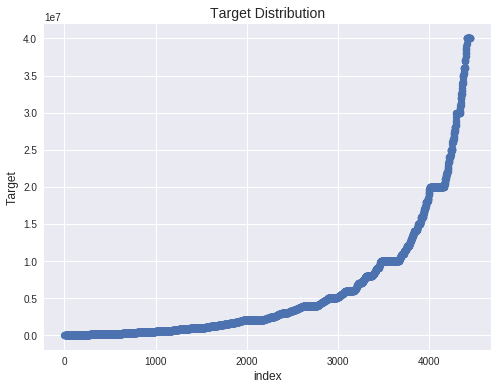

In [9]:
plt.figure(figsize= (8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df['target'].values))
plt.xlabel('index', fontsize = 12)
plt.ylabel('Target', fontsize = 12)
plt.title("Target Distribution", fontsize = 14)
plt.show()


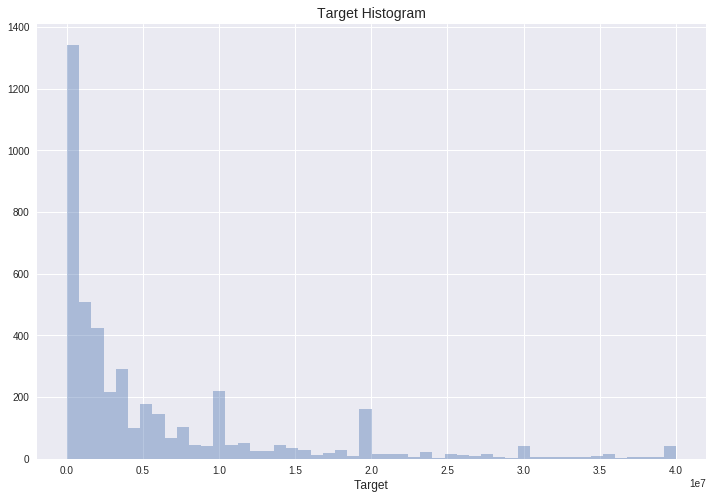

In [10]:
plt.figure(figsize= (12,8))
sns.distplot(train_df["target"].values, kde = False, bins = 50)
plt.xlabel('Target', fontsize = 12)
plt.title("Target Histogram", fontsize = 14)
plt.show()

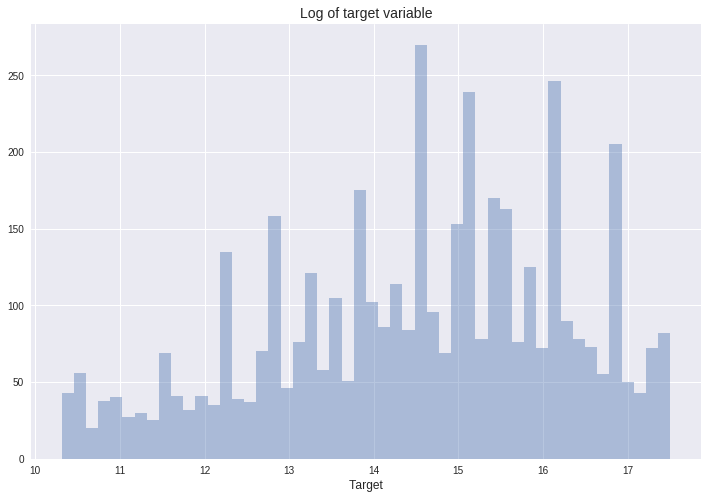

In [11]:
plt.figure(figsize= (12,8))
sns.distplot(np.log1p(train_df['target'].values), bins = 50, kde = False)
plt.xlabel('Target', fontsize = 12)
plt.title("Log of target variable", fontsize = 14 )
plt.show()

In [12]:
missing_df = train_df.isnull().sum(axis= 0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by = 'missing_count')
missing_df

,column_name,missing_count


In [13]:
unique_df = train_df.nunique().reset_index()
unique_df.columns= ['col_name', 'unique_count']
constant_df = unique_df[unique_df['unique_count']==1]
constant_df.shape


(256, 2)

In [14]:
str(constant_df.col_name.tolist())

"['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a742107', '08b9ec4ae', 'd95203ded

In [0]:
train_id = train_df['ID']
train_target = np.log1p(train_df['target'])

In [0]:
train_df.drop(constant_df.col_name, axis =1 , inplace = True)

In [17]:
train_df.shape

(4459, 4737)

In [0]:
train_df.drop('ID', axis = 1, inplace = True)
train_df.drop('target', axis = 1, inplace = True)


In [19]:
train_df.shape

(4459, 4735)

In [20]:
train_df.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,233c7c17c,2cb4d123e,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,593d5a082,eef3f5c49,b495b7492,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,c38ca8ae3,b21f5b472,1ff6be905,b9b7f388d,51ebff825,1a5a424f8,51c534b54,22b980fc8,9cc5d1d8f,7720ab0dd,63be1f619,f18d3931b,a61ce65a2,b77bc4dac,be448d5b9,5a53ebb69,437ff8730,c224ec4d9,212226b7b,170230a4c,c98c2d3c0,d5858c659,e8f065c9d,856225035,039b8bbc6,d4e8dd865,c44348d76,cc35ec717,d2919256b,b0b1c81ac,1f1f641f1,5df2068b0,6cd6037bd,a61dfaaa3,aac0c81ba,87ba106d3,cb5161856,aaed60a3d,29714c47d,2ab5a56f5,aeb3a6ccf,0badd2fa2,63c094ba4,5693d94b2,c14e46633,b1b17b543,c5dacc85b,90a438099,fa6e76901,ef4b87773,14a5969a6,342e7eb03,cdf5a5db0,5661462ee,4c60b70b8,7e1c4f651,de14e7687,a1995906f,f2af9300f,1110cf9ea,61b568ab8,1e9bdf471,4da206d28,82ba7a053,9c3f5714f,084031585,c1b9f4e76,848b67fcc,0ce078942,34d3974de,04e06920e,5a88b7f01,5985f4c31,77da28065,65aa7f194,9ca45f3c8,fd1187d68,770bef1c6,f5f97a9e8,3ad3d521e,707f193d9,bacadce94,73700eaa4,c69492ae6,65000b269,dc135562a,1d0aaa90f,7497a6bc9,2ca23426b,bfde2aa61,b0c8d785d,b09a8c37b,b30e932ba,8516b48f5,0a52be28f,506e25985,f519ac616,faf024fa9,3377a30e2,8f3807320,d0d340214,d00346a32,29c059dd2,0b26c77a9,d95cab24f,330006bce,4fbcb9f95,bc2eb559b,7e7bf15be,7d72d6787,9bd66acf6,aebe1ea16,89a26cda9,da2d942d5,5680531f3,3694b34c5,3be79d4a5,c2cabb902,8e48aed7b,d6bca77b4,3aab2691c,b0d770462,64406f348,f1c272f04,9abaeaeba,1074273db,47cd6e6e4,ccf6632e6,0544dfc09,2761e2b76,3a01b4018,05d17ab7a,4f0c5f900,600ea672f,c5a742ee4,b04bab75e,935ca66a9,8e1822aa3,cd41bbc4e,5c220a143,9ba5eb33d,a728310c8,d168174c7,ee7c4db36,e8dfb33d5,5547d6e11,78bc2558b,96be55d28,2ea42a33b,37e85aa12,2b85882ad,9236f7b22,3d655b0ed,dc6676b1f,64834659b,1477c751e,aee922a7b,22f0deffc,d481882a1,3b67e9641

In [0]:
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

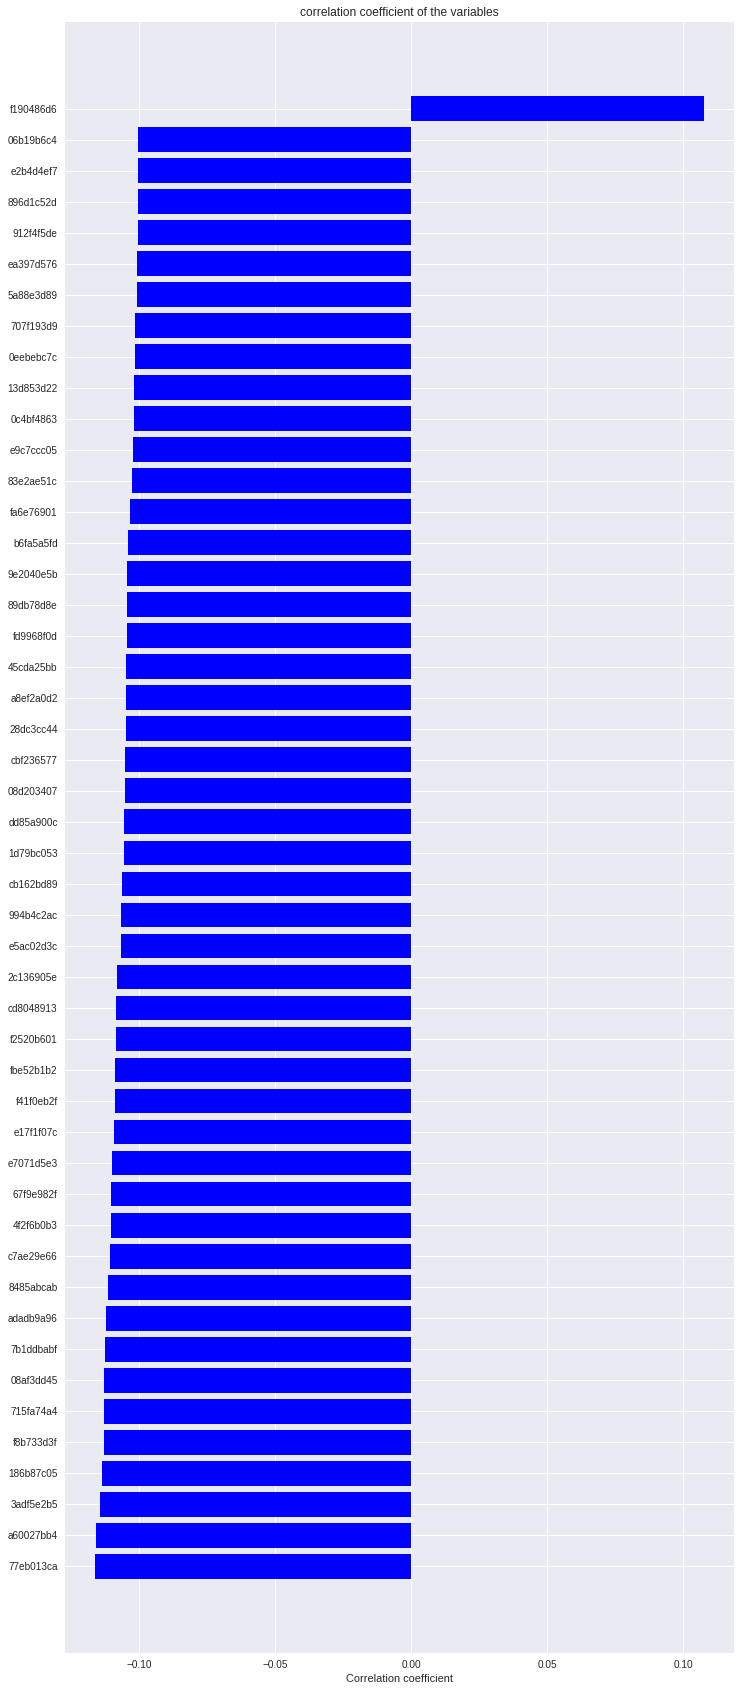

In [22]:
label = []
values = []

for col in train_df.columns:
  label.append(col)
  values.append(spearmanr(train_df[col].values, train_target.values)[0])

corr_df = pd.DataFrame({'col_labels': label, 'corr_values': values})
corr_df = corr_df.sort_values(by = 'corr_values')

corr_df = corr_df[(corr_df['corr_values']>0.1) | (corr_df['corr_values']< -0.1)]
ind = np.arange(corr_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='b')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation = 'horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('correlation coefficient of the variables')
plt.show()

In [23]:
set(corr_df.col_labels)

{'06b19b6c4',
 '08af3dd45',
 '08d203407',
 '0c4bf4863',
 '0eebebc7c',
 '13d853d22',
 '186b87c05',
 '1d79bc053',
 '28dc3cc44',
 '2c136905e',
 '3adf5e2b5',
 '45cda25bb',
 '4f2f6b0b3',
 '5a88e3d89',
 '67f9e982f',
 '707f193d9',
 '715fa74a4',
 '77eb013ca',
 '7b1ddbabf',
 '83e2ae51c',
 '8485abcab',
 '896d1c52d',
 '89db78d8e',
 '912f4f5de',
 '994b4c2ac',
 '9e2040e5b',
 'a60027bb4',
 'a8ef2a0d2',
 'adadb9a96',
 'b6fa5a5fd',
 'c7ae29e66',
 'cb162bd89',
 'cbf236577',
 'cd8048913',
 'dd85a900c',
 'e17f1f07c',
 'e2b4d4ef7',
 'e5ac02d3c',
 'e7071d5e3',
 'e9c7ccc05',
 'ea397d576',
 'f190486d6',
 'f2520b601',
 'f41f0eb2f',
 'f8b733d3f',
 'fa6e76901',
 'fbe52b1b2',
 'fd9968f0d'}

In [0]:
train_df.drop(set(train_df.columns)-set(corr_df.col_labels), axis = 1, inplace = True)

In [25]:
train_df.shape

(4459, 48)

In [0]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics 
from sklearn.grid_search import GridSearchCV

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [0]:
from sklearn.metrics import make_scorer
my_scorer = make_scorer(rmse, greater_is_better=False)

In [0]:
def modelfit (alg, train_df, train_target, useTrainCV=True, cv_folds =5, early_Stopping_rounds = 50):
  
  if useTrainCV:
    xgb_params = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(train_df.values, train_target.values)
    cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round= alg.get_params()['n_estimators'], nfold = cv_folds, metrics = 'rmse', early_stopping_rounds= early_Stopping_rounds)
    alg.set_params(n_estimators = cvresult.shape[0])
    print(cvresult)
  eval_set = [(train_df, train_target)]
  alg.fit(train_df, train_target, eval_metric = 'rmse', eval_set=eval_set)
  
  dtrain_predictions = alg.predict(train_df)
  
  rms = sqrt(mean_squared_error(train_target, dtrain_predictions))
  print('Accuracy: {}'.format(rms))
  alg.best_score, alg.best_iteration, alg.best_ntree_limit
  
  feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
  feat_imp.plot(kind = 'bar', title = 'Feature Importance')
  plt.ylabel('Feature Importance Score')

In [0]:
model = XGBRegressor(learning_rate = 0.1, n_estimators = 1000, max_depth = 10, min_child_weight =5, gamma = 0, subsample = 1.0, colsample_bytree = 0.8, objective = 'reg:linear')

In [51]:
modelfit(model, train_df, train_target)

    test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0        12.712892       0.063278        12.712600        0.013889
1        11.467413       0.064484        11.466033        0.012438
2        10.348002       0.065796        10.345923        0.011047
3         9.344023       0.066373         9.340464        0.010034
4         8.441509       0.066947         8.437649        0.009073
5         7.633317       0.067525         7.628776        0.007683
6         6.909458       0.066223         6.903902        0.007567
7         6.260852       0.065447         6.254519        0.007163
8         5.681379       0.064591         5.674018        0.006926
9         5.165246       0.062310         5.156128        0.007305
10        4.704142       0.060391         4.693871        0.007197
11        4.295331       0.059244         4.282882        0.007141
12        3.931363       0.058100         3.917222        0.006264
13        3.611209       0.056004         3.594004        0.00

[25]	validation_0-rmse:1.80135
[26]	validation_0-rmse:1.75504
[27]	validation_0-rmse:1.71605
[28]	validation_0-rmse:1.68407
[29]	validation_0-rmse:1.65583
[30]	validation_0-rmse:1.63404
[31]	validation_0-rmse:1.61536
[32]	validation_0-rmse:1.59862
[33]	validation_0-rmse:1.58543
[34]	validation_0-rmse:1.57502
[35]	validation_0-rmse:1.56593
[36]	validation_0-rmse:1.5575
[37]	validation_0-rmse:1.55147
[38]	validation_0-rmse:1.54617
[39]	validation_0-rmse:1.54144
[40]	validation_0-rmse:1.53774
[41]	validation_0-rmse:1.53464
[42]	validation_0-rmse:1.53216
[43]	validation_0-rmse:1.53013
[44]	validation_0-rmse:1.52818
[45]	validation_0-rmse:1.5264
[46]	validation_0-rmse:1.52464
[47]	validation_0-rmse:1.52316
[48]	validation_0-rmse:1.5221
[49]	validation_0-rmse:1.52028
[50]	validation_0-rmse:1.51952
[51]	validation_0-rmse:1.51839
Accuracy: 1.5183864993443268


AttributeError: ignored

In [30]:
param_test1 = {'max_depth': np.arange(3,10,2)}

Gsearch1 =  GridSearchCV(estimator = XGBRegressor(learning_rate = 0.1, n_estimators = 55, max_depth = 5, min_child_weight=1, gamma =0, subsample = 0.8, colsample_bytree =0.8, objective ='reg:linear', nthread =4, seed =4),
                         param_grid =  param_test1, scoring = my_scorer ,verbose=3, n_jobs =4, iid = False ,cv =5)

Gsearch1.fit(train_df, train_target)
Gsearch1.grid_scores_, Gsearch1.best_params_ , Gsearch1.best_score_


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=3 .....................................................
[CV] max_depth=3 .....................................................
[CV] max_depth=3 .....................................................
[CV] max_depth=3 .....................................................
[CV] ........................... max_depth=3, score=-1.571459 -   1.4s
[CV] ........................... max_depth=3, score=-1.634295 -   1.5s
[CV] ........................... max_depth=3, score=-1.588187 -   1.5s
[CV] ........................... max_depth=3, score=-1.601952 -   1.4s
[CV] max_depth=3 .....................................................
[CV] max_depth=5 .....................................................
[CV] max_depth=5 .....................................................
[CV] max_depth=5 .....................................................
[CV] ........................... max_depth=3, score=-1.715811 -   0.5s
[CV] max_depth=5 

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    7.5s finished


([mean: -1.62234, std: 0.05109, params: {'max_depth': 3},
  mean: -1.62378, std: 0.05055, params: {'max_depth': 5},
  mean: -1.62516, std: 0.05072, params: {'max_depth': 7},
  mean: -1.62860, std: 0.04815, params: {'max_depth': 9}],
 {'max_depth': 3},
 -1.622340896378153)

In [0]:
param_test1 = {
 
 'min_child_weight':np.arange(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=55, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4,seed=27), 
 param_grid = param_test1, scoring = my_scorer ,verbose=3,n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_df, train_target)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] min_child_weight=1 ..............................................
[CV] min_child_weight=1 ..............................................
[CV] min_child_weight=1 ..............................................
[CV] min_child_weight=1 ..............................................


In [37]:
rms = sqrt(mean_squared_error(train_target, train_pred))
print('Accuracy: {}'.format(rms))

Accuracy: 1.539736211680645


In [0]:
test_ID = test_df['ID']

In [0]:
test_df.drop(set(train_df.columns)-set(corr_df.col_labels), axis = 1 , inplace = True)

In [0]:
test_predict = model.predict(test_df)

In [205]:
test_predict

array([14.432015, 14.479176, 14.479176, ..., 14.479176, 14.479176,
       14.479176], dtype=float32)

In [0]:
test_back = np.expm1(test_predict)

In [0]:
submission = pd.DataFrame({'ID': test_ID, 'target': test_back})
submission.to_csv('XGBoost.csv', index = False)

In [208]:
test_ID

0        000137c73
1        00021489f
2        0004d7953
3        00056a333
4        00056d8eb
5        0005fc190
6        000787e86
7        0008510a0
8        000895faf
9        000986fba
10       0009efcc5
11       000dd8f00
12       000e1cdc2
13       00103739c
14       00134b367
15       001788d0d
16       0019c8ad7
17       001a267b9
18       001a85486
19       001c4de06
20       001f9014b
21       00216fb94
22       00235690e
23       00240739d
24       0024c3747
25       00297052d
26       002ab8f85
27       002bed5c0
28       002bf3974
29       002d23a26
           ...    
49312    ffd52b8f2
49313    ffd6dea20
49314    ffd6e2cf8
49315    ffd6e56de
49316    ffd849299
49317    ffda13e24
49318    ffdbd30e2
49319    ffdbedc99
49320    ffe462df4
49321    ffe4c3a4b
49322    ffe511bf1
49323    ffe77e420
49324    ffe868610
49325    ffe8ed3d6
49326    ffea1065e
49327    ffea9a398
49328    ffec4707c
49329    ffecfe7f8
49330    ffed9dd0f
49331    ffee0237c
49332    ffef8aa08
49333    fff